<a href="https://colab.research.google.com/github/mlccgkpol/makeMore/blob/main/bigram_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
words = open("names.txt",'r').read().splitlines()

In [7]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
len(words)

32033

In [19]:
print(list(zip(words[0],words[0][1:])))

[('e', 'm'), ('m', 'm'), ('m', 'a')]


In [28]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  # print(chs,"chs")
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1,ch2)

In [ ]:
sorted(b.items(), key = lambda kv: kv[1], reverse = True)

In [40]:
import torch

In [119]:
N = torch.zeros((27,27), dtype = torch.int32)

In [120]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [121]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  # print(chs,"chs")
  for ch1, ch2 in zip(chs, chs[1:]):
    N[stoi[ch1],stoi[ch2]]+=1
    # print(ch1,ch2)

In [183]:
def buildDiagram(N):
  plt.figure(figsize=(16,16))
  plt.imshow(N, cmap = 'Blues')
  for i in range(27):
    for j in range(27):
      chstr = itos[i] + itos[j]
      plt.text(j,i,chstr, ha = "center", va = "bottom", color = 'gray')
      plt.text(j,i,N[i,j].item(), ha = "center", va = "top", color = 'gray')
  plt.axis("off");

In [96]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [123]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

----------------------------------------

In [98]:
chars = ['.'] + [chr(i) for i in range(ord('a'), ord('z') + 1)]

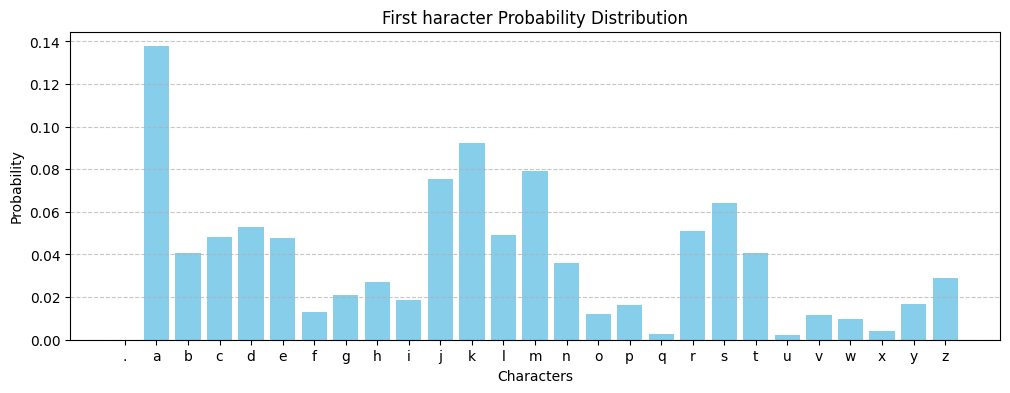

In [99]:
plt.figure(figsize=(12, 4))
plt.bar(chars, p, color='skyblue')
plt.xlabel('Characters')
plt.ylabel('Probability')
plt.title('First haracter Probability Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [106]:
q_temp = torch.Generator().manual_seed(2147483647)
p_temp = torch.rand(3, generator=q_temp)
p_temp = p_temp/p_temp.sum()
p_temp

tensor([0.6064, 0.3033, 0.0903])

what does the above function does is it creates the frequency of indices (0,1,2) in such a way that it satisfies the above probability(p).
You can see that if 0's is 'a' times, then 1's are about a/2 and 1 are about a/6 times. (0.6,0.3,0.1).

In [107]:
torch.multinomial(p_temp,num_samples=20,replacement=True, generator=q_temp)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [115]:
q = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=q).item()
print(itos[ix])

j


In [145]:
P = (N + 100).float() #model smoothing and N+100 adds 100 to each element.
print(P.shape)
# P.sum(1,keepdim=True)
P /= P.sum(1, keepdim=True)
# 0 here means on 0th dimension, it will become 1 and it will sum across the column.
# is it possible to divide [27,27] an [27,1]?? good point.

# Broadcasting rules in pytorch ->

# Each tensor has at least one dimension.
# When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


torch.Size([27, 27])


In [144]:
P[0].sum()

tensor(1.)

In [157]:
def generateStrings(P):
  q = torch.Generator().manual_seed(2147483647)
  ix = 0
  for i in range(5):
    out = []
    while True:
      p = P[ix]
      ix = torch.multinomial(p,num_samples=1,replacement=True,generator=q).item()
      if ix == 0:
        break;
      out.append(itos[ix])
    print(''.join(out))


In [ ]:
# Homework - Broadcasting Semantics. Very Important.

In [168]:
P_temp = (N).float()
P_temp = P_temp/P_temp.sum(1)
generateStrings(P_temp)

juwidedigwaquzopruffyobinn
fovinttophows
gwevisliniauwabileviackhbduinrwiqulysstyicaylaftezufftumestfodoumjuppptsuwahouzzi
core
ysezockhawavedinerimouffwynin


In [155]:
# 27,27
# 27

#27,27
# 1,27 it will shift the 27 right.

# so we will have problem instead of normalizing rows, we are normalizing column.

# Thats why (keepdim = true) to get desired result when required.

In [178]:
for w in ["rohit"]:
  chs = ['.'] + list(w) + ['.']
  logProb = 0;
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logProb += -torch.log(prob)
logProb/=3
print(f'{ch1}{ch2} -> {prob:.4f} -> {logProb: .4f}')

t. -> 0.0867 ->  5.9238


In [ ]:
# minimize negative log likelihood.